<a href="https://colab.research.google.com/github/kartikayladdha/BDT/blob/main/Lab%203/%20BigData_Dask_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Vidhi Kapoor - J021**
#**Kartikay Laddha - J025**

Installling the required packages

In [1]:
!pip install dask
!pip install graphviz

Importing the multiprocessing module 

In [2]:
import multiprocessing 
import os
def print_cube(num): 
    """ 
    function to print cube of given num 
    """
    print(os.getpid())
    print("Cube: {}".format(num * num * num)) 

def print_square(num): 
    """ 
    function to print square of given num 
    """
    print(os.getpid())
    print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
    # creating processes 
    p1 = multiprocessing.Process(target=print_square, args=(10, )) 
    p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

    # starting process 1 
    p1.start() 
    # starting process 2 
    p2.start() 

    # wait until process 1 is finished 
    p1.join() 
    # wait until process 2 is finished 
    p2.join() 

    # both processes finished 
    print("Done!") 


1692
Square: 100
1694
Cube: 1000
Done!


In [3]:
from time import sleep

def apply_discount(x):
    sleep(1)
    x = x - 0.3*x
    return x

def get_total(a,b):
    sleep(1)
    return a+b

def total_price(x,y):
    sleep(1)
    a = apply_discount(x)
    b = apply_discount(y)
    print(get_total(a,b))

In [4]:
%%time
a = apply_discount(1000)
b = apply_discount(1000)
get_total(a,b)

CPU times: user 14.2 ms, sys: 2.42 ms, total: 16.7 ms
Wall time: 3 s


In [5]:
import dask
from dask import delayed

x = delayed(apply_discount)(1000)
y = delayed(apply_discount)(4000)
z = delayed(total_price)(x, y)

z.visualize()


z.compute()

2450.0


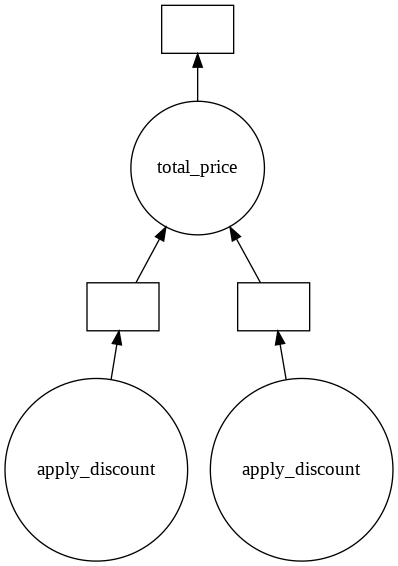

In [6]:
z.visualize()

In [7]:
# Functions to perform mathematics operations
def square(x):
    return x*x

def double(x):
    return x*2

def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = delayed(square)(i)
    b = delayed(double)(i)
    c = delayed(add)(a, b)
    output.append(c)

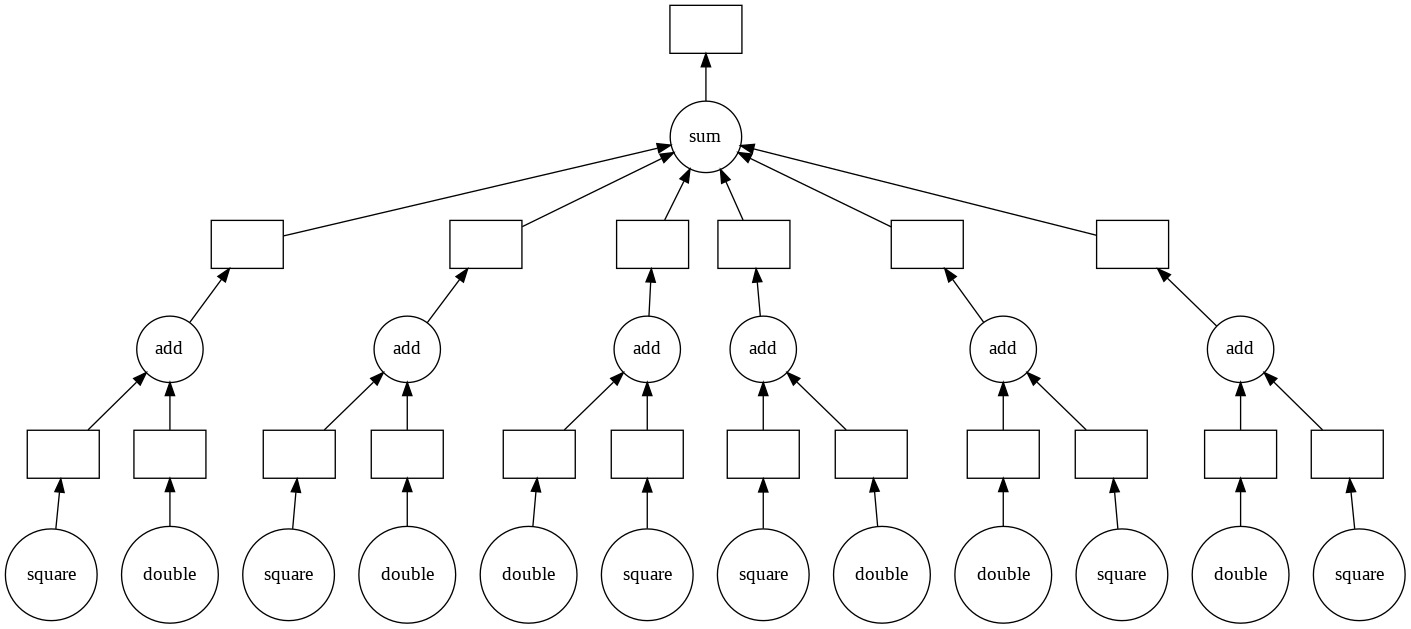

In [8]:
total = delayed(sum)(output)
total.visualize()

In [9]:
import concurrent

In [10]:
import multiprocessing
multiprocessing.cpu_count()

2

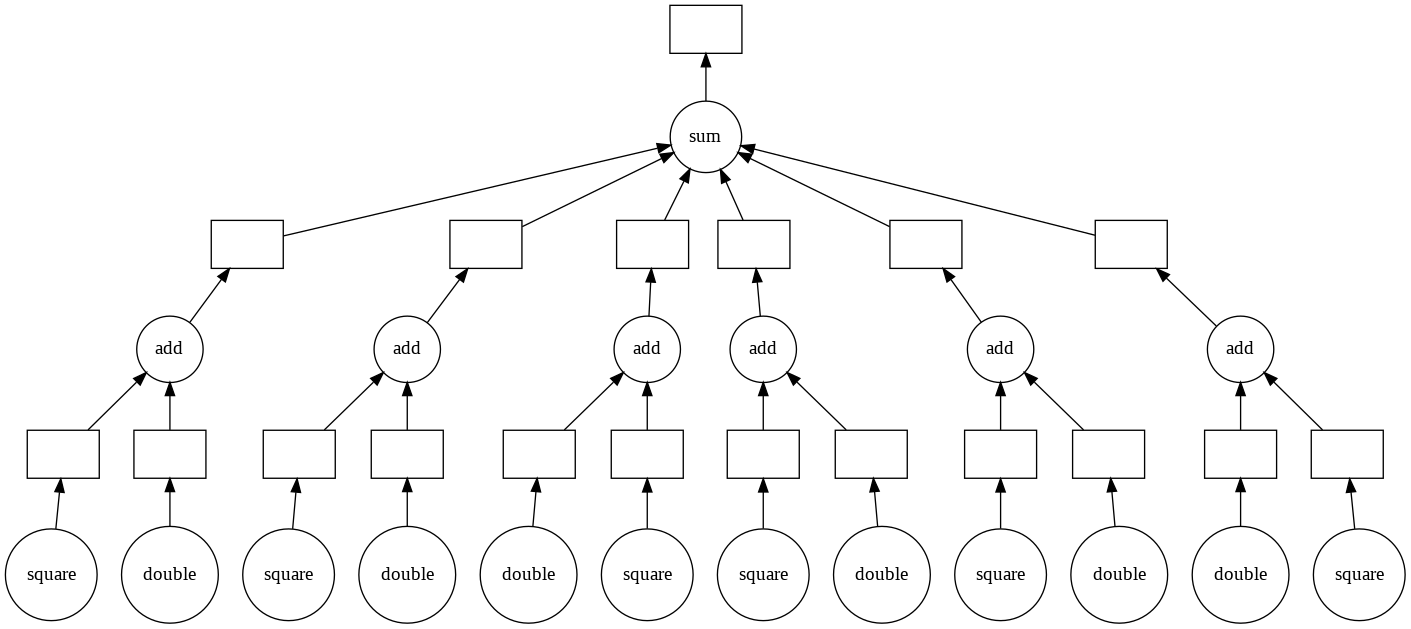

In [11]:
# Functions to perform mathematics operations
@delayed
def square(x):
    return x*x
@delayed
def double(x):
    return x*2
@delayed
def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)

total = delayed(sum)(output)
total.visualize()

In [12]:
!pip install dask[dataframe]

In [13]:
import dask.dataframe as dd

In [14]:
dask.__version__

'2.12.0'

In [15]:
df = dask.datasets.timeseries()

In [16]:
df.head()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1023,Charlie,-0.616965,-0.257330
2000-01-01 00:00:01,1049,Laura,-0.107723,0.583427
2000-01-01 00:00:02,969,Kevin,-0.640487,-0.108169
2000-01-01 00:00:03,1011,Tim,-0.057685,-0.397366
2000-01-01 00:00:04,1002,Yvonne,-0.098390,-0.289815


In [17]:
df1 = df.groupby('name').y.std()

In [18]:
df1

Dask Series Structure:
npartitions=1
    float64
        ...
Name: y, dtype: float64
Dask Name: sqrt, 67 tasks

In [19]:
df1.compute()

name
Alice       0.577571
Bob         0.577661
Charlie     0.577375
Dan         0.576890
Edith       0.576902
Frank       0.576375
George      0.576918
Hannah      0.578350
Ingrid      0.577893
Jerry       0.578321
Kevin       0.576416
Laura       0.577171
Michael     0.577302
Norbert     0.575895
Oliver      0.576388
Patricia    0.578096
Quinn       0.577450
Ray         0.577683
Sarah       0.577772
Tim         0.577839
Ursula      0.578055
Victor      0.578668
Wendy       0.577931
Xavier      0.578515
Yvonne      0.576979
Zelda       0.576641
Name: y, dtype: float64

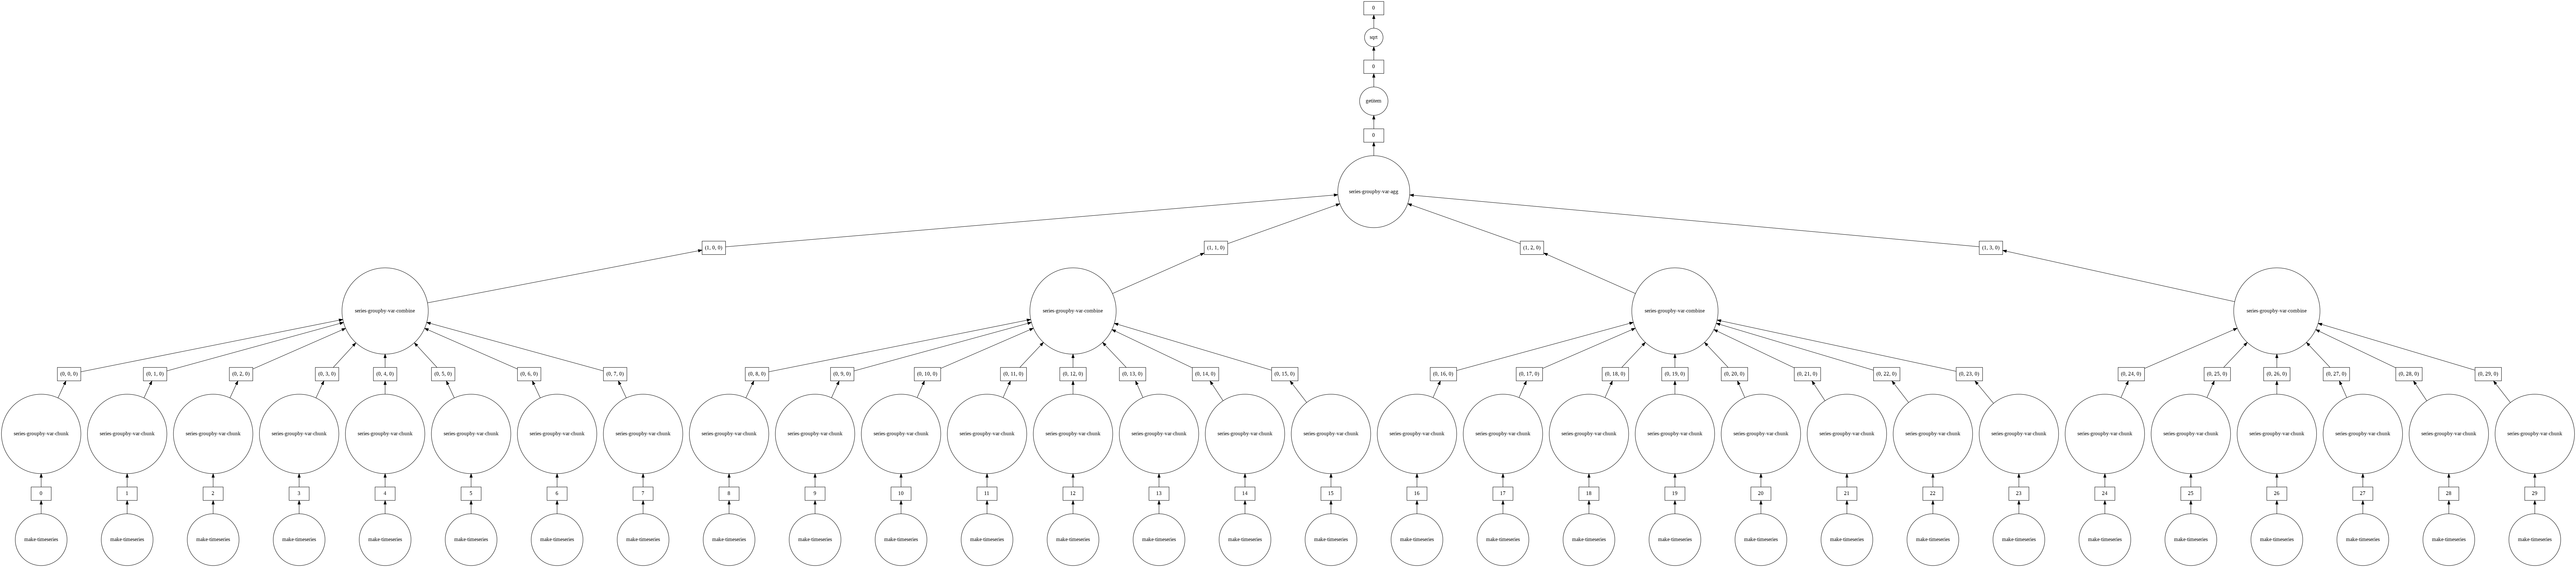

In [20]:
df1.visualize()

In [21]:
%time
df.loc['2000-01-01']

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


,id,name,x,y
npartitions=1,,,,
2000-01-01 00:00:00.000000000,int64,object,float64,float64
2000-01-01 23:59:59.999999999,...,...,...,...


In [22]:
df = df.persist()

In [23]:
%time
df.loc['2000-01-01'].compute()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1023,Charlie,-0.616965,-0.257330
2000-01-01 00:00:01,1049,Laura,-0.107723,0.583427
2000-01-01 00:00:02,969,Kevin,-0.640487,-0.108169
2000-01-01 00:00:03,1011,Tim,-0.057685,-0.397366
2000-01-01 00:00:04,1002,Yvonne,-0.098390,-0.289815
...,...,...,...,...
2000-01-01 23:59:55,1039,Jerry,0.024928,-0.262701
2000-01-01 23:59:56,981,Zelda,-0.042186,-0.738295
2000-01-01 23:59:57,992,Tim,-0.300391,-0.262769


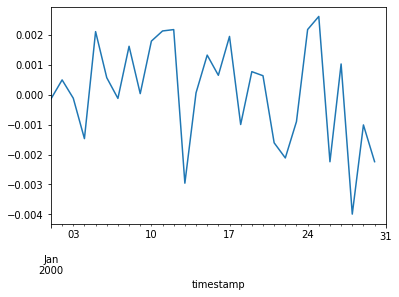

In [24]:
%matplotlib inline
df['y'].resample('24h').mean().compute().plot()

In [25]:
len(df)

2592000

In [26]:
from dask.distributed import Client
import pandas as pd
import time
import numpy as np

In [27]:
df = pd.DataFrame(np.random.random(size=(10000000, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
df.head()

,param_a,param_b,param_c,param_d
0,0.498860,0.714175,0.519802,0.252157
1,0.435113,0.895256,0.656226,0.538843
2,0.510839,0.809881,0.723469,0.516135
3,0.651285,0.015188,0.561897,0.886666
4,0.205490,0.262643,0.629076,0.584367


In [28]:
def costly_simulation(list_param):
    time.sleep(3)
    return sum(list_param)

In [29]:
%%time
results = []
for col in df.columns:
    result = costly_simulation(df[col].values)
    results.append(result)

CPU times: user 6.95 s, sys: 29.8 ms, total: 6.98 s
Wall time: 18.9 s


In [30]:
results

[4998675.173738011, 4999990.419528333, 4999787.265639531, 5000290.780999902]

In [31]:
import dask

In [32]:
%%time
results = []
for col in df.columns:
    result =dask.delayed(costly_simulation)(df[col].values)
    results.append(result)

CPU times: user 626 µs, sys: 41 µs, total: 667 µs
Wall time: 750 µs


Here we see that dask runs so much faster. With dask, it computed in 1.68 ms and without dask it took 7.45 seconds.

In [33]:
results[0]

Delayed('costly_simulation-5783b76d-76fb-4646-9a73-7447e6fbbb37')

In [34]:
%time dask.compute(*results)

CPU times: user 6.94 s, sys: 42.8 ms, total: 6.98 s
Wall time: 12.9 s


(4998675.173738011, 4999990.419528333, 4999787.265639531, 5000290.780999902)